# Audio Dynamic Range Compression

This notebook demonstrates how to apply dynamic range compression to audio using the `librosa` library. We will:
1. Load and preprocess an audio file.
2. Apply dynamic range compression to the audio.
3. Visualize and output the compressed audio.

## Explanation
Dynamic range compression reduces the volume of loud sounds and amplifies quieter sounds, resulting in a more consistent audio level. This can be useful for speech-to-text processing as it ensures that all parts of the speech are audible, even if the speaker's volume varies. However, over-compression can lead to a loss of natural dynamics in the audio.


## Step 1: Install Requirements

In [7]:
# Setup Environment
import subprocess

# Suppress the warning by setting the PIP_ROOT_USER_ACTION environment variable
!export PIP_ROOT_USER_ACTION=ignore

def run_command(name=None, command=None):
    """run_command _summary_

    Args:
        name (_type_, optional): _description_. Defaults to None.
        command (_type_, optional): _description_. Defaults to None.
    """
    display_name = name if name else f"'{command}'"
    print(f"Running {display_name}... ", end="")
    try:
        if command:
            subprocess.run(command, check=True, shell=True)
        else:
            subprocess.run(name, check=True, shell=True)
        print("\033[1;32mOK\033[0m")  # Bold Green
    except subprocess.CalledProcessError as e:
        if e.returncode == 1:  # Assuming '1' is a warning
            print("\033[1;33mWARNING\033[0m")  # Bold Yellow
        else:
            print("\033[1;31mERROR\033[0m")  # Bold Red

# Install torch, numpy, matplotlib, soundfile
run_command(name="pip install librosa numpy matplotlib soundfile", command="PIP_ROOT_USER_ACTION=ignore pip install -q librosa numpy matplotlib soundfile")

Running pip install librosa numpy matplotlib soundfile... OK


## Step 2: Load Libraries

In [2]:
# Import necessary libraries
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

## Step 3: Load the Audio File

We start by loading an audio file using `soundfile`. The audio needs to be in a format supported by `librosa`.

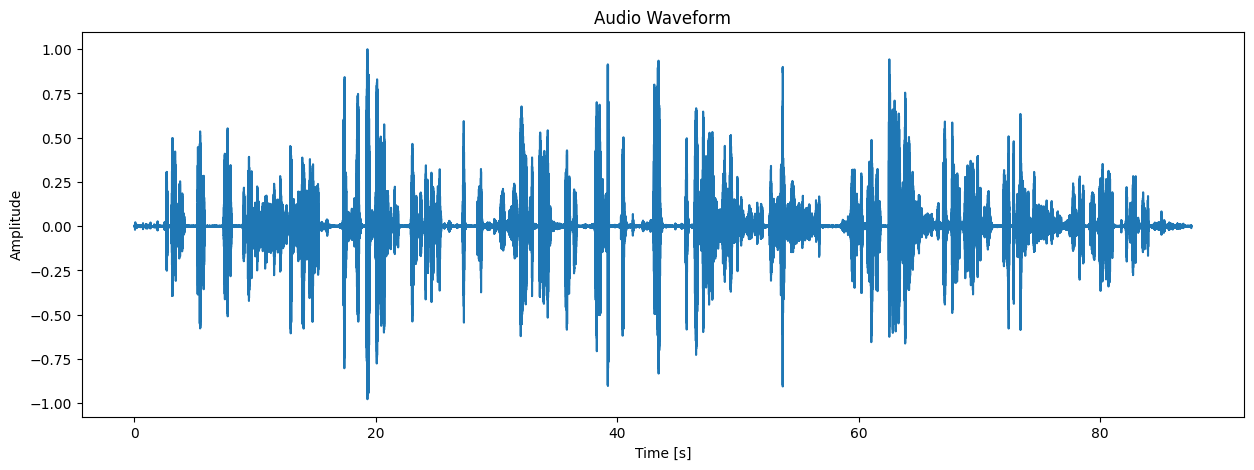

In [3]:
# Load the audio file
audio_filepath = "../../test_pcm.wav"
audio, sample_rate = sf.read(audio_filepath)

# Plot the audio waveform
plt.figure(figsize=(15, 5))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.title('Audio Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


## Step 4: Apply Dynamic Range Compression

Next, we apply dynamic range compression to the audio file using `librosa.effects.percussive`.

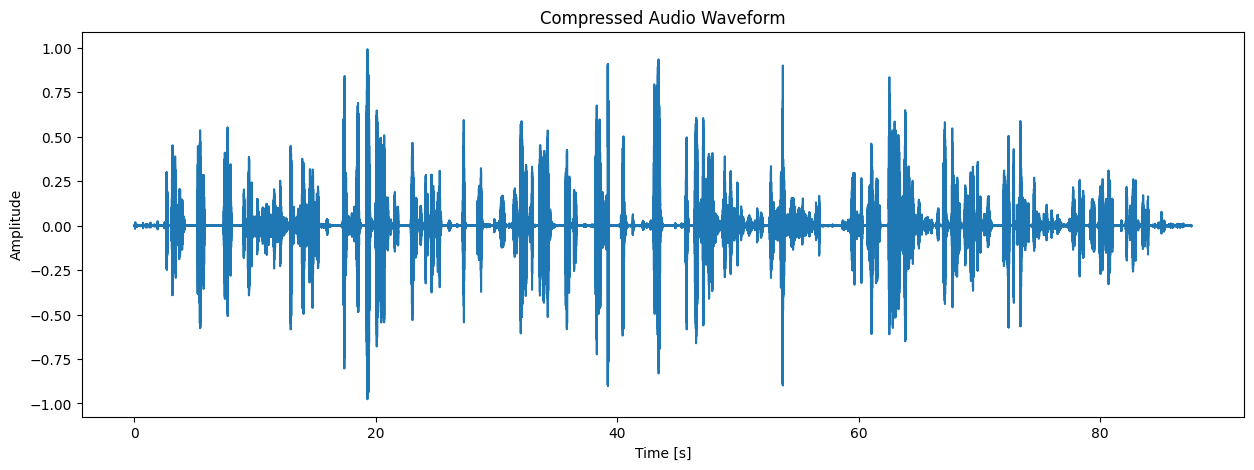

In [4]:
# Apply dynamic range compression
compressed_audio = librosa.effects.percussive(audio)

# Plot the compressed audio waveform
plt.figure(figsize=(15, 5))
plt.plot(np.linspace(0, len(compressed_audio) / sample_rate, num=len(compressed_audio)), compressed_audio)
plt.title('Compressed Audio Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


## Step 5: Save & Compare Compressed Audio

We save the compressed audio to a new file and inspect the before and after results.

Compressed audio saved to ../compressed_audio.wav



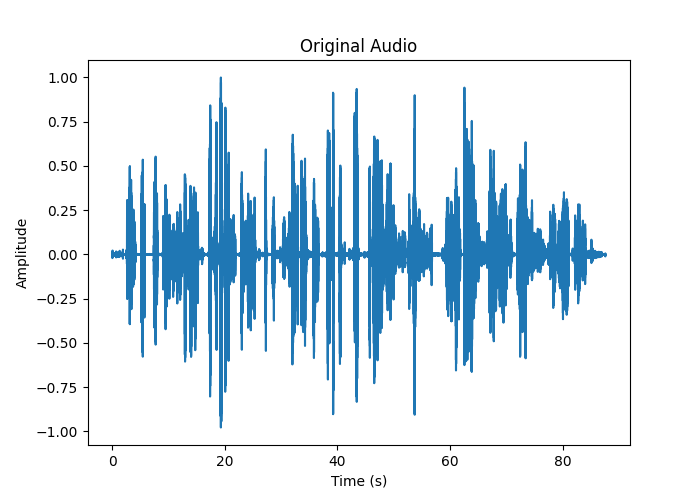
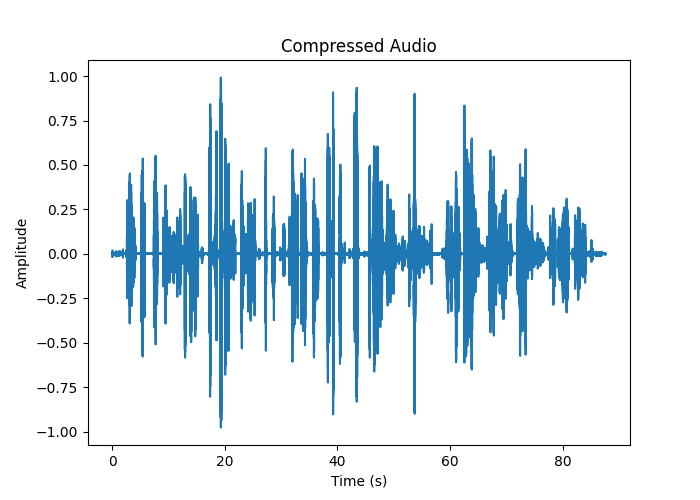

In [5]:
import IPython.display as ipd
from IPython.display import display, HTML

# Save the compressed audio
output_filepath = "../compressed_audio.wav"
# sf.write(output_filepath, compressed_audio, sample_rate)
print(f"Compressed audio saved to {output_filepath}")

# Function to convert a matplotlib plot to a base64 encoded PNG image
def plt_to_base64(x, y, title):
    """Convert a matplotlib plot to a base64 encoded PNG image."""
    import io
    import base64
    plt.figure(figsize=(7, 5))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    plt.close()
    return image_base64

# Generate the waveforms for the original and compressed audio
time_original = np.linspace(0, len(audio) / sample_rate, num=len(audio))
time_compressed = np.linspace(0, len(compressed_audio) / sample_rate, num=len(compressed_audio))

# Create the HTML layout for plots and audio widgets side by side
html_content = f"""
<div style="display: flex; justify-content: space-around; align-items: flex-start;">
    <div>
        <h4>Original Audio</h4>
        <img src="data:image/png;base64,{plt_to_base64(time_original, audio, 'Original Audio')}" alt="Original Audio Waveform"/>
        <br>
        {ipd.Audio(audio, rate=sample_rate)._repr_html_()}
    </div>
    <div>
        <h4>Compressed Audio</h4>
        <img src="data:image/png;base64,{plt_to_base64(time_compressed, compressed_audio, 'Compressed Audio')}" alt="Compressed Audio Waveform"/>
        <br>
        {ipd.Audio(compressed_audio, rate=sample_rate)._repr_html_()}
    </div>
</div>
"""

# Display the HTML content
display(HTML(html_content))

## Conclusion

In this notebook, we demonstrated how to apply dynamic range compression to audio using the `librosa` library. We loaded and preprocessed the audio, applied compression and visualized the compressed audio.